## Exploration

In [5]:
# importing general libraries
import random
import numpy as np
from functools import reduce
import tensorflow as tf
import pandas as pd
from sklearn import linear_model
from plotnine import * 
import matplotlib.pyplot as plt

In [6]:
# setting seeds
random.seed(96)
np.random.seed(96)

In [7]:
# setting seeds for replication
random.seed(96)
npr.seed(96)

mean_blue = np.random.multivariate_normal(
    size = 10,
    mean = np.array([1,0]),
    cov = np.identity(2) ## this 2D vector provides the 2D dimensionality to the the outcome vector (10x2)
)
mean_blue

array([[ 1.06984777, -0.04866513],
       [ 0.34025379,  0.35736923],
       [ 1.13203993, -0.86841854],
       [ 0.47984708,  0.08056762],
       [-0.20220815, -0.99686509],
       [-0.93034998,  0.10395258],
       [ 0.20614499, -0.43662182],
       [ 0.90281127, -0.44721525],
       [ 1.62602389,  0.43533254],
       [ 1.25184462,  0.08354337]])

In [8]:
df_mean_blue = pd.DataFrame(
    data = mean_blue,
    columns = ['cx','cy']
)
df_mean_blue

,cx,cy
0,1.069848,-0.048665
1,0.340254,0.357369
2,1.132040,-0.868419
3,0.479847,0.080568
4,-0.202208,-0.996865
5,-0.930350,0.103953
6,0.206145,-0.436622
7,0.902811,-0.447215
8,1.626024,0.435333
9,1.251845,0.083543


In [10]:
# setting seeds for replication purposes
random.seed(96)
np.random.seed(96)

mean_orange = np.random.multivariate_normal(
    size = 10,
    mean = np.array([0,1]),
    cov = np.identity(2) ## this 2D vector provides the 2D dimensionality to the the outcome vector (10x2)
)
mean_orange.shape

(10, 2)

In [11]:
df_mean_orange = pd.DataFrame(
    data = mean_orange,
    columns = ['cx','cy']
)
df_mean_orange

,cx,cy
0,0.069848,0.951335
1,-0.659746,1.357369
2,0.132040,0.131581
3,-0.520153,1.080568
4,-1.202208,0.003135
5,-1.930350,1.103953
6,-0.793855,0.563378
7,-0.097189,0.552785
8,0.626024,1.435333
9,0.251845,1.083543


## plotting

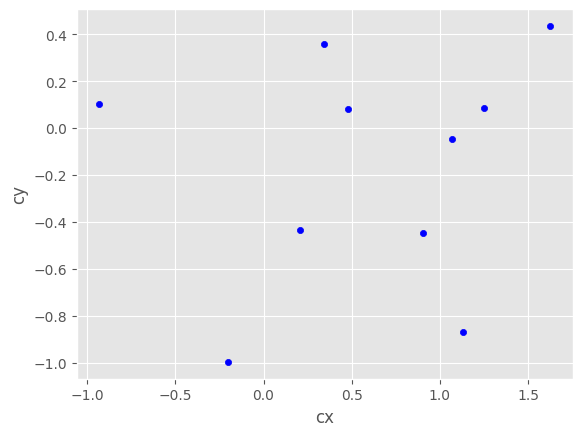

In [13]:
## creating the same theme as used in R
plt.style.use('ggplot')

plt_mean_blue = df_mean_blue.plot.scatter(
    x = 'cx',
    y = 'cy',
    c = 'blue'
)
plt.show()

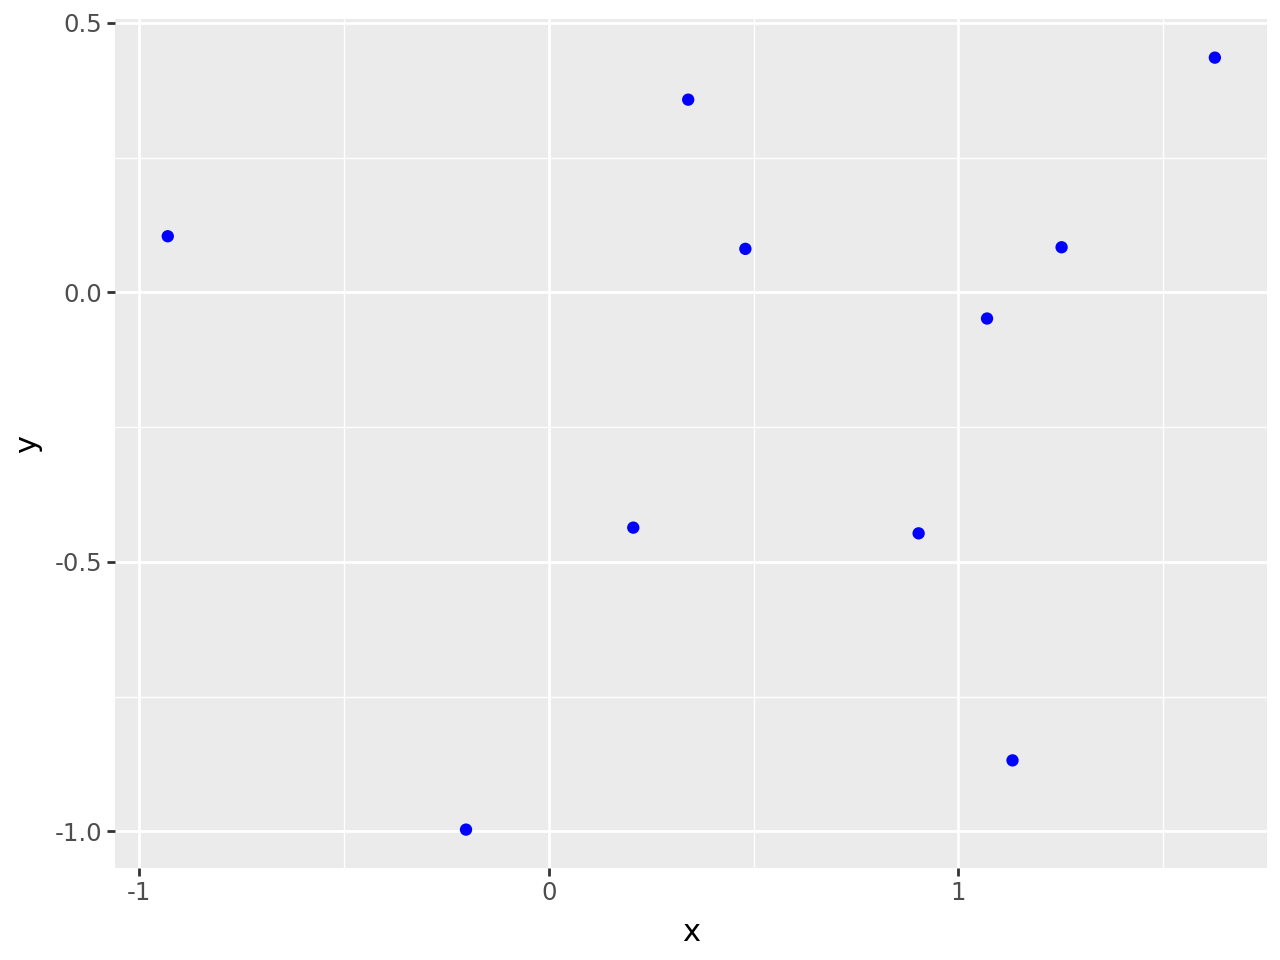

In [16]:
ggplot_mean_blue = ggplot(df_mean_blue) + aes(x= 'cx', y='cy') + geom_point(colour="blue") + xlab('x') + ylab('y')
ggplot_mean_blue

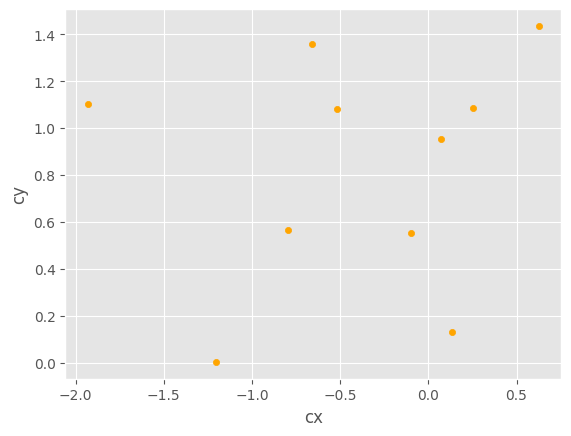

In [17]:
## creating the same theme as used in R using matplotlib.pyplot
plt.style.use('ggplot')

plt_mean_orange = df_mean_orange.plot.scatter(
    x = 'cx',
    y = 'cy',
    c = 'orange'
)
plt.show()

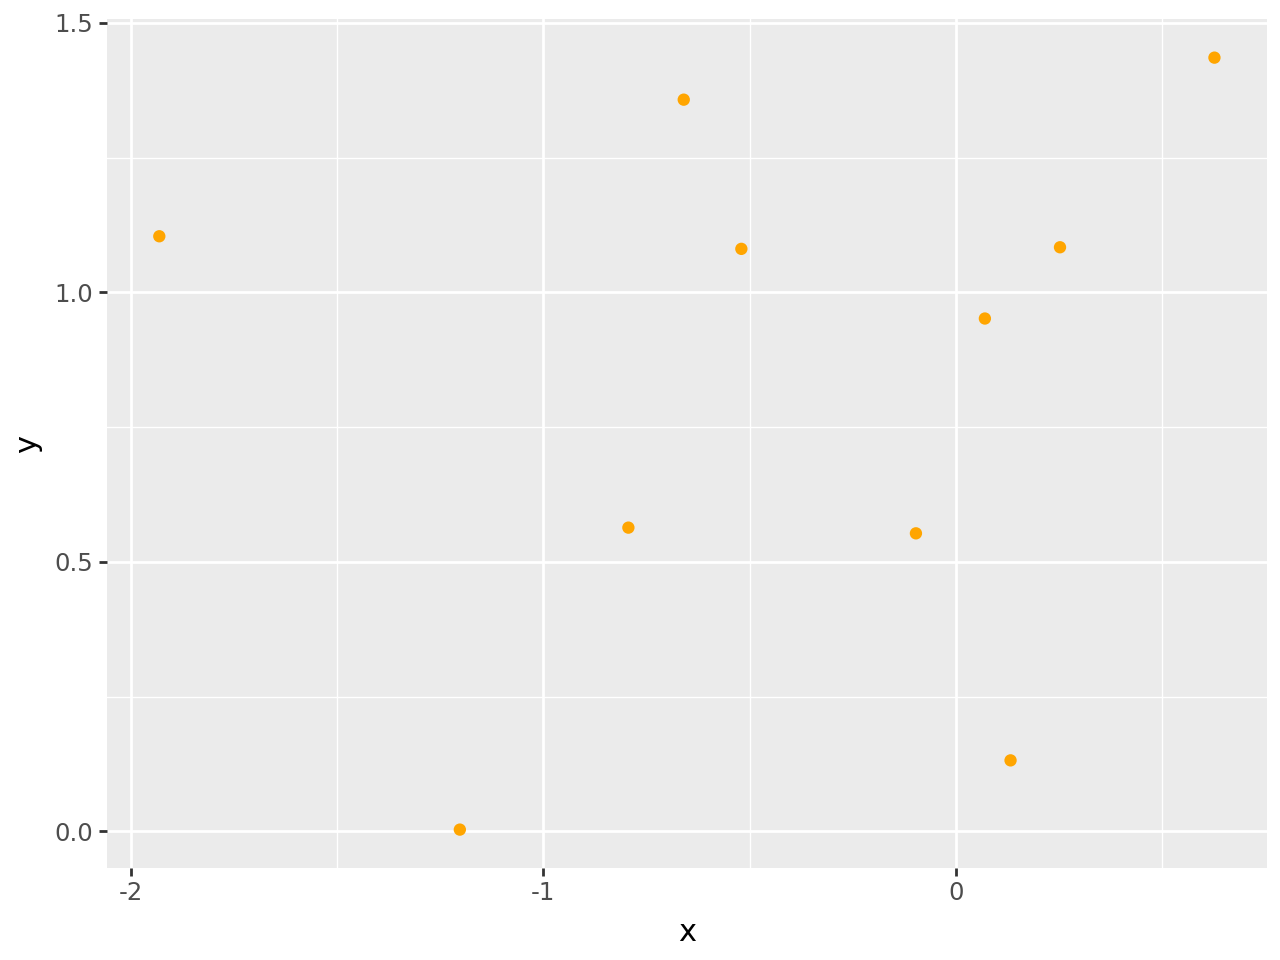

In [18]:
ggplot_mean_orange = ggplot(df_mean_orange) + aes(x= 'cx', y='cy') + geom_point(colour="orange") + xlab('x') + ylab('y')
ggplot_mean_orange

### joining plots

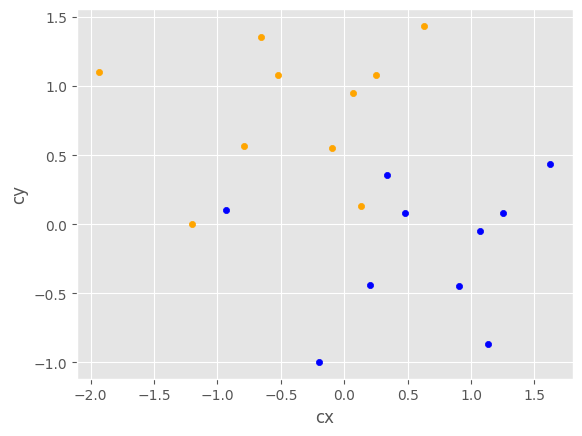

In [19]:
fig, ax = plt.subplots()

df_mean_blue.plot.scatter(
    x = 'cx',
    y = 'cy',
    c = 'blue',
    ax=ax
)
df_mean_orange.plot.scatter(
    x = 'cx',
    y = 'cy',
    c = 'orange',
    ax=ax
)

plt.show()


In [131]:
join_plot = ggplot_mean_blue + geom_point(data=df_mean_orange, colour='orange') + aes(x='cx', y='cy') + xlab('x') + ylab('y')

## Modeling

In [22]:
# setting seeds
random.seed(96)
np.random.seed(96)

# setting variables for multivariate matrix
data_mean_blue = mean_blue[np.random.randint(mean_blue.shape[0]),]
data_mean_orange = mean_orange[np.random.randint(mean_orange.shape[0]),]
data_cov = (np.identity(2) / 5)


## here we use map function over a vector of length iterations to simulate repeat function in R
## example: np.array(list(map(lambda _: [np.random.randint(7),0], [None]*iterations)))
N = 200
data_blue = np.array(
    list(
        map(
            lambda _: 
                np.append(
                    np.random.multivariate_normal(
                        size = 1,
                        mean = data_mean_blue,
                        cov = data_cov
                    )
                ,0), [None]*N
        )
    )
)

data_orange = np.array(
    list(
        map(
            lambda _: 
                np.append(np.random.multivariate_normal(
                size = 1,
                mean = data_mean_orange,
                cov = data_cov
                ),1), [None]*N
        )
    )
)


In [23]:
# storing the data as data frames

data_blue = pd.DataFrame(data=data_blue, columns = ['cx', 'cy', 'Y'])
data_orange = pd.DataFrame(data=data_orange, columns = ['cx', 'cy', 'Y'])

**Note:** In jupyter notebooks, in case there is need to remove created variables we can use _%reset_selective <variables>_ command.

In [24]:
# joining data frames
mix_data = pd.concat([data_blue,data_orange], ignore_index = True, axis = 0)
mix_data = mix_data.sample(frac = 1, ignore_index = True)

In [193]:
threshold = 0.5

lr = linear_model.LinearRegression()
lr.fit(mix_data[['cx','cy']],mix_data[['Y']])

lr_slope = lr.coef_
lr_intercept = lr.intercept_

prediction = lr.predict(mix_data[['cx','cy']])
prediction_accuracy = np.mean((prediction>threshold) == mix_data[['Y']])

In [183]:
lr_slope[0][0]

-0.17387267802584577

In [194]:
def expand_grid(*arrs):
    """
    Taken out of github gist, url: https://gist.github.com/fauxneticien/2ff31c5ec32e2545e9bf749fc9b15d08
    """
    ncols = len(arrs)
    nrows = reduce(lambda x, y: x * y, map(len, arrs), 1)
    
    return np.array(np.meshgrid(*arrs)).reshape(ncols, nrows).T


meshpixel = 100

x_pixel = np.linspace(-3,4,num=meshpixel)
y_pixel = np.linspace(-3,3,num=meshpixel)
df_mesh = pd.DataFrame(expand_grid(x_pixel,y_pixel), columns=['cx','cy'])
predict_df_mesh = lr.predict(df_mesh[['cx','cy']])
color_mesh_int = pd.DataFrame((predict_df_mesh>threshold).astype(int), columns=['Y'])
color_mesh_st = color_mesh_int[['Y']].apply(lambda row: 'orange' if row['Y'] == 0 else 'blue', axis=1)
color_mesh_st

color_df_mesh = pd.concat([df_mesh,color_mesh_int,color_mesh_st], axis=1)
color_df_mesh.columns = ['cx','cy','Y','color']

In [185]:
lr_slope

array([[-0.17387268,  0.42115882]])

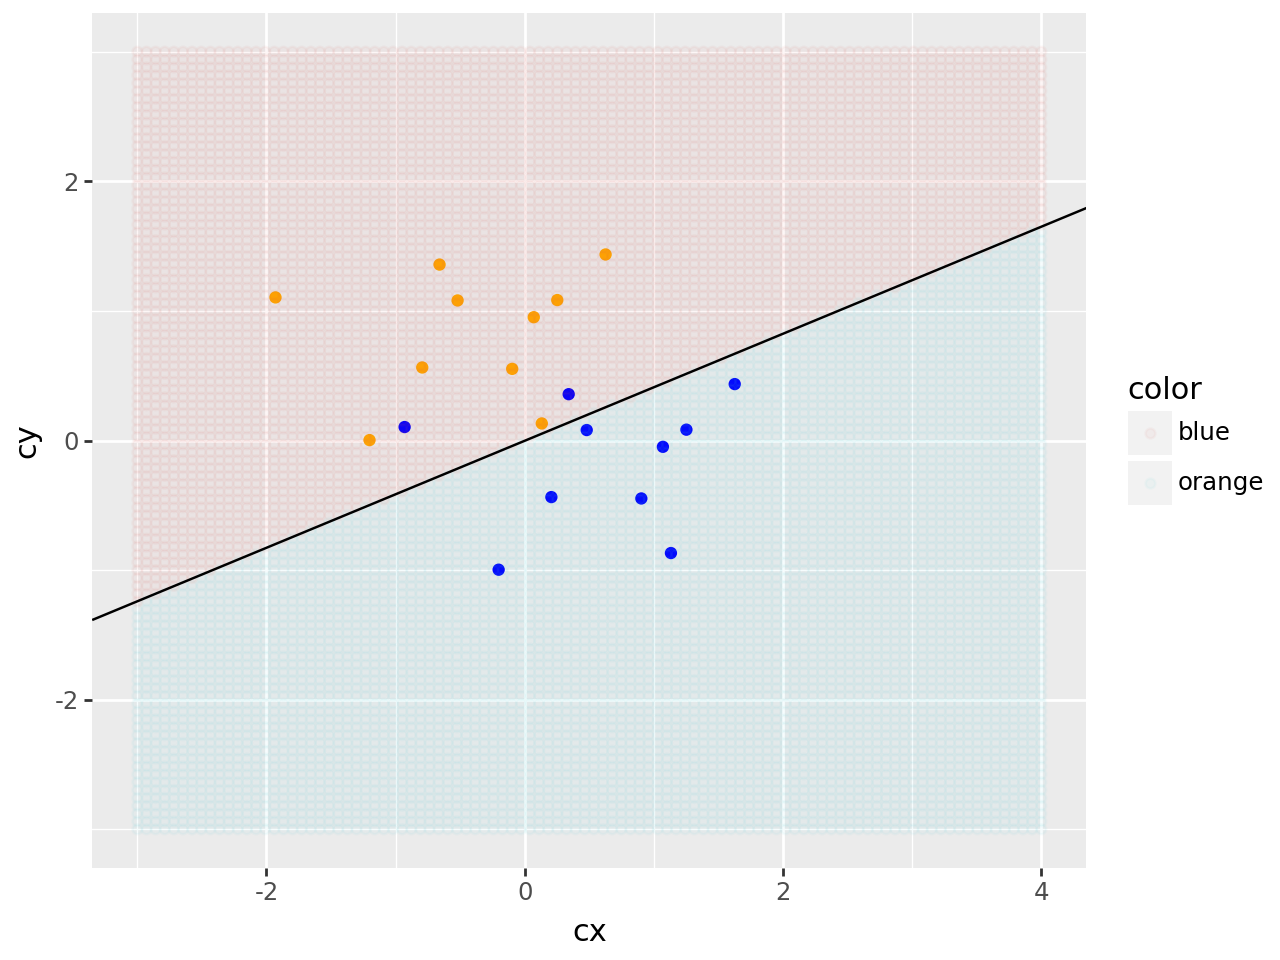

In [195]:
# threshold = lr_slope[0][0]*cx + lr_slope[0][1]*cy + lr_coef[0]

join_plot + geom_point(data=color_df_mesh, alpha=0.05) + aes(x='cx',y='cy', color='color') + geom_abline(intercept=threshold-lr_intercept[0], slope=-lr_slope[0][0]/lr_slope[0][1])